# Import Relevant Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [8]:
# Import raw data
df = pd.read_csv('t120_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,140.375575,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
0,551.0,659.0,762.0,816.0,992.0,903.0,1024.0,1165.0,1113.0,1143.0,...,1803.0,1784.0,1844.0,1796.0,1743.0,1867.0,1795.0,1839.0,1763.0,1745.0
1,514.0,578.0,760.0,774.0,962.0,931.0,986.0,1115.0,1156.0,1127.0,...,1800.0,1740.0,1830.0,1744.0,1815.0,1661.0,1781.0,1721.0,1851.0,1750.0
2,538.0,662.0,775.0,794.0,972.0,971.0,1019.0,1122.0,1137.0,1176.0,...,1919.0,1813.0,1837.0,1811.0,1844.0,1938.0,1751.0,1874.0,1864.0,1864.0
3,523.0,651.0,774.0,889.0,971.0,925.0,1024.0,1089.0,1213.0,1245.0,...,1939.0,1875.0,1887.0,1891.0,1857.0,1860.0,1884.0,1961.0,1935.0,1725.0
4,492.0,615.0,800.0,746.0,977.0,997.0,1106.0,1056.0,1174.0,1226.0,...,1922.0,1992.0,1937.0,1909.0,1921.0,1869.0,1985.0,2014.0,1968.0,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,595.0,668.0,881.0,892.0,1040.0,1040.0,1134.0,1154.0,1330.0,1313.0,...,1229.0,1256.0,1277.0,1196.0,1251.0,1276.0,1216.0,1271.0,1242.0,1247.0
1365,556.0,655.0,834.0,864.0,974.0,1081.0,1094.0,1204.0,1212.0,1308.0,...,1347.0,1240.0,1295.0,1315.0,1241.0,1209.0,1298.0,1200.0,1330.0,1272.0
1366,622.0,682.0,837.0,943.0,1102.0,1056.0,1183.0,1228.0,1230.0,1318.0,...,1246.0,1290.0,1297.0,1186.0,1306.0,1271.0,1241.0,1226.0,1296.0,1245.0
1367,620.0,752.0,899.0,828.0,1070.0,1151.0,1187.0,1253.0,1359.0,1312.0,...,1335.0,1265.0,1330.0,1255.0,1259.0,1269.0,1380.0,1280.0,1339.0,1251.0


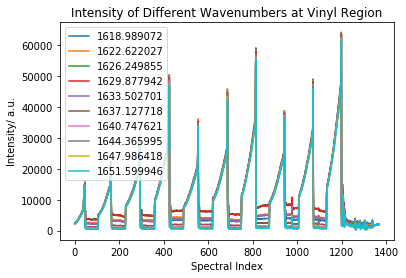

In [9]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region')
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [10]:
# df.loc[:,'1629.559307'] --> When using loc.
# df.columns.get_loc('1629.124559') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label 1629.559307. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

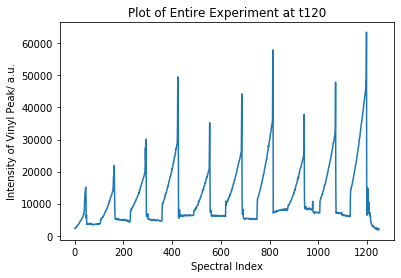

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:1250,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t120')
plt.show()

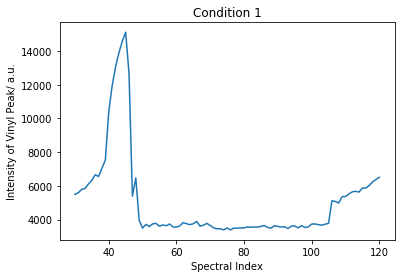

In [6]:
# Condition
df.loc[30:120,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1')
plt.show()

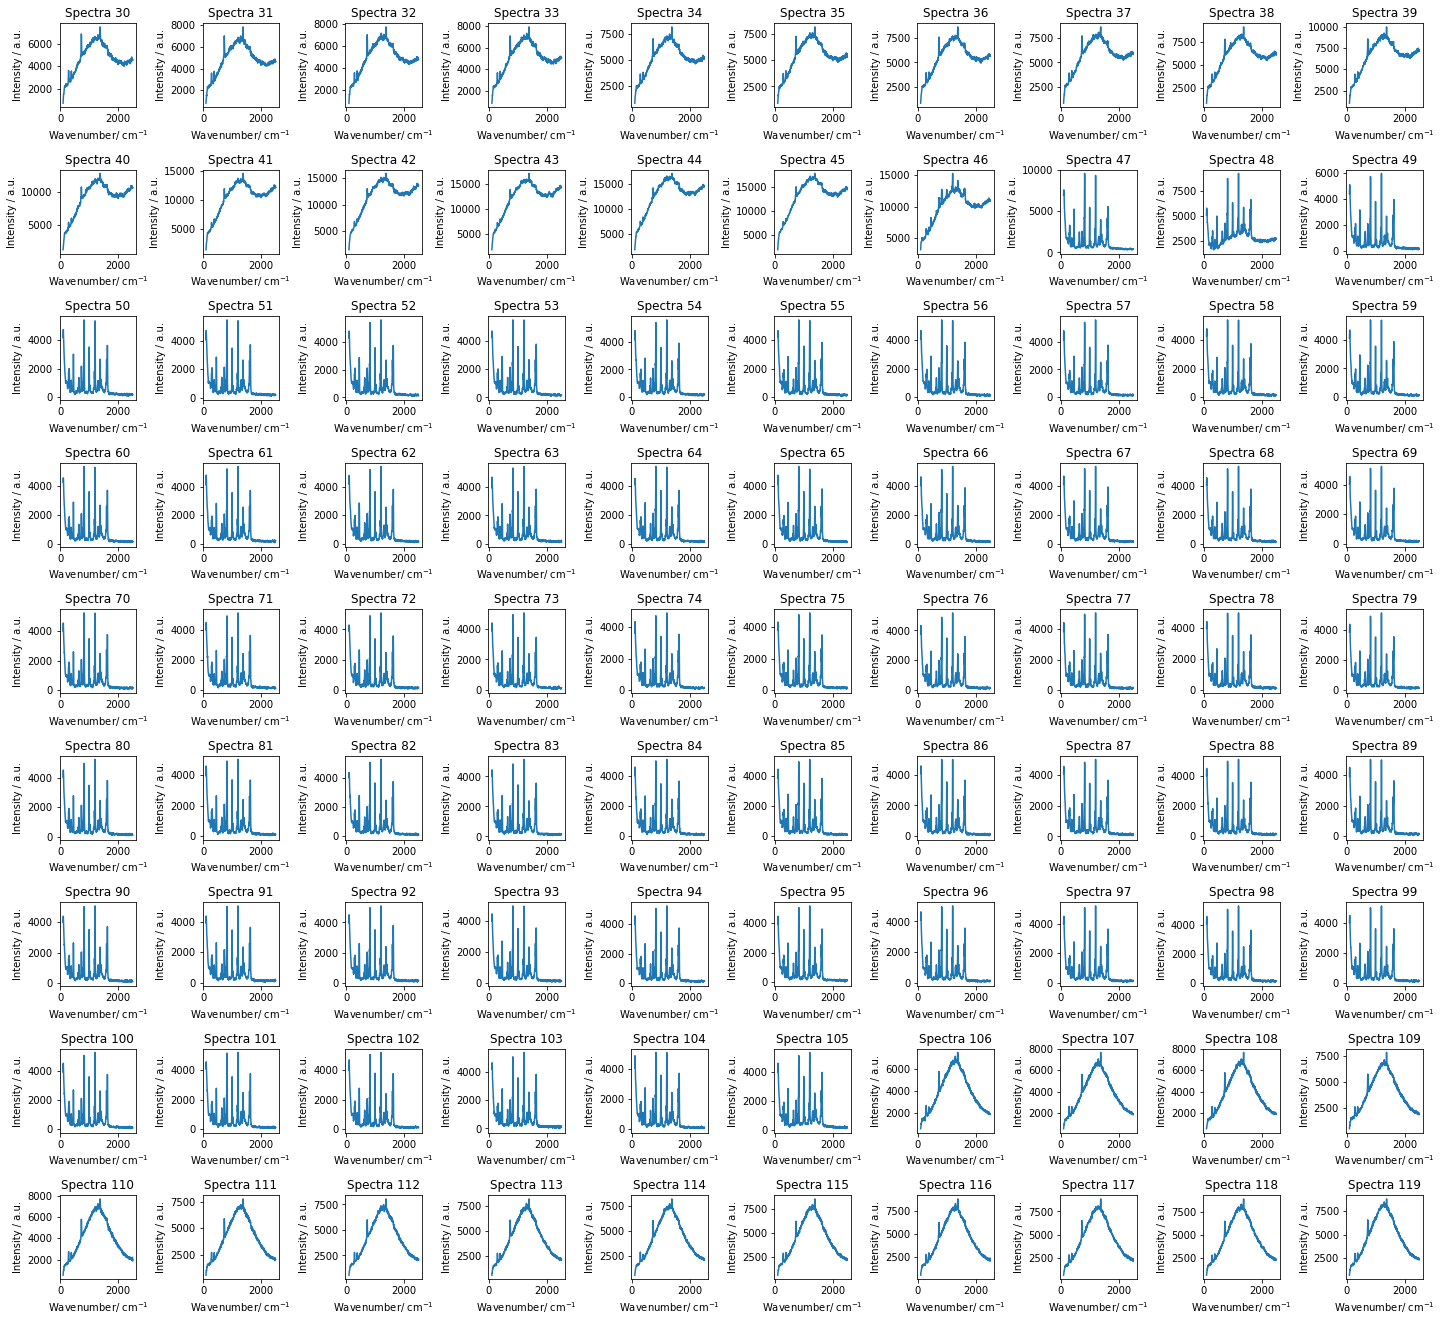

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(30, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-29))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[80:99, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =1)
condition1_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
80,1,4037.0,4351.0,4507.0,4274.0,4114.0,3487.0,3250.0,2991.0,2663.0,...,212.0,123.0,148.0,145.0,136.0,115.0,134.0,153.0,147.0,91.0
81,1,3949.0,4447.0,4579.0,4230.0,4009.0,3436.0,3162.0,2964.0,2699.0,...,170.0,106.0,159.0,96.0,137.0,97.0,159.0,97.0,111.0,123.0
82,1,4019.0,4294.0,4366.0,4223.0,3968.0,3432.0,3176.0,3016.0,2686.0,...,150.0,135.0,174.0,94.0,128.0,122.0,134.0,159.0,166.0,97.0
83,1,4029.0,4388.0,4439.0,4058.0,3931.0,3458.0,3231.0,2993.0,2838.0,...,183.0,143.0,158.0,164.0,122.0,143.0,180.0,144.0,185.0,129.0
84,1,4055.0,4437.0,4619.0,4163.0,4027.0,3629.0,3279.0,3012.0,2724.0,...,130.0,132.0,106.0,92.0,134.0,107.0,156.0,129.0,161.0,111.0
85,1,3872.0,4394.0,4461.0,4211.0,3917.0,3501.0,3249.0,3050.0,2755.0,...,138.0,99.0,135.0,100.0,139.0,150.0,157.0,116.0,124.0,73.0
86,1,4078.0,4407.0,4562.0,4230.0,3929.0,3548.0,3154.0,2982.0,2806.0,...,125.0,128.0,121.0,67.0,178.0,112.0,183.0,121.0,143.0,144.0
87,1,4075.0,4432.0,4531.0,4335.0,3975.0,3621.0,3239.0,2978.0,2844.0,...,102.0,96.0,97.0,139.0,127.0,149.0,145.0,138.0,183.0,84.0
88,1,4017.0,4462.0,4498.0,4184.0,3823.0,3542.0,3240.0,3083.0,2725.0,...,130.0,123.0,172.0,140.0,199.0,167.0,196.0,150.0,135.0,164.0
89,1,3924.0,4447.0,4514.0,4193.0,3915.0,3564.0,3187.0,3023.0,2840.0,...,87.0,148.0,158.0,115.0,114.0,118.0,180.0,93.0,162.0,131.0


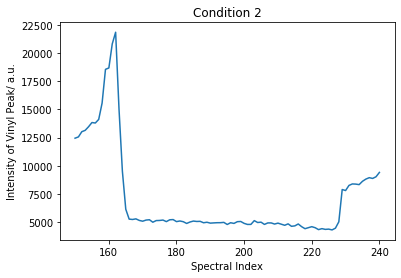

In [9]:
# Condition
df.loc[150:240,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2')
plt.show()

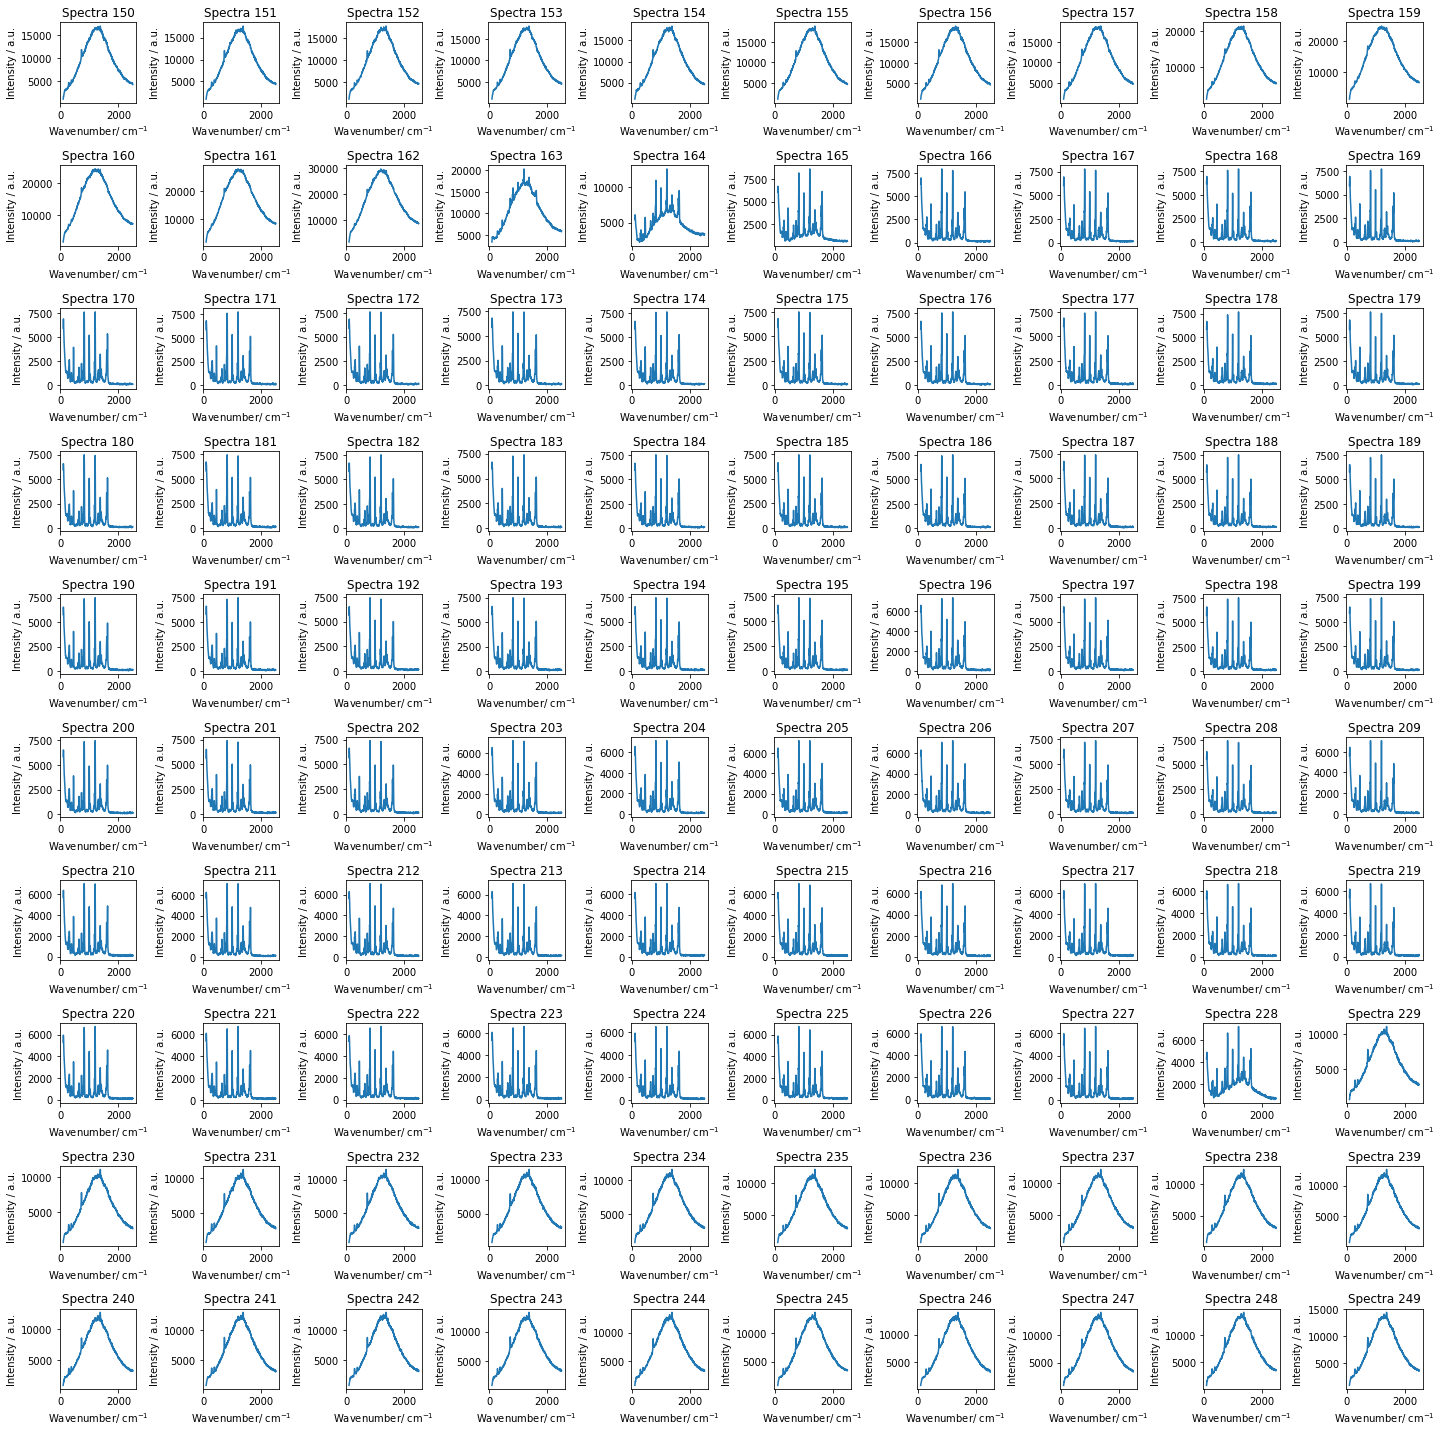

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(150, 250):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-149))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[200:219, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =2)
condition2_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
200,2,5846.0,6427.0,6528.0,6280.0,5761.0,5069.0,4692.0,4460.0,4023.0,...,214.0,116.0,118.0,81.0,121.0,143.0,195.0,113.0,164.0,109.0
201,2,5652.0,6375.0,6516.0,6141.0,5825.0,5178.0,4579.0,4346.0,4076.0,...,86.0,130.0,136.0,87.0,147.0,77.0,210.0,148.0,177.0,88.0
202,2,5690.0,6506.0,6642.0,6201.0,5668.0,5084.0,4586.0,4320.0,3940.0,...,114.0,146.0,81.0,69.0,123.0,178.0,134.0,161.0,110.0,99.0
203,2,5858.0,6427.0,6575.0,6253.0,5653.0,5061.0,4587.0,4122.0,4008.0,...,140.0,113.0,143.0,105.0,131.0,105.0,218.0,128.0,117.0,128.0
204,2,5756.0,6547.0,6505.0,6190.0,5704.0,5069.0,4509.0,4246.0,3989.0,...,156.0,94.0,110.0,124.0,126.0,103.0,147.0,164.0,164.0,112.0
205,2,5585.0,6412.0,6488.0,6079.0,5667.0,5017.0,4539.0,4209.0,3954.0,...,111.0,120.0,126.0,153.0,157.0,163.0,145.0,148.0,102.0,154.0
206,2,5780.0,6281.0,6332.0,6132.0,5541.0,5108.0,4489.0,4316.0,3996.0,...,88.0,106.0,95.0,83.0,112.0,142.0,137.0,165.0,172.0,142.0
207,2,5659.0,6355.0,6481.0,6028.0,5600.0,4996.0,4735.0,4162.0,4049.0,...,126.0,98.0,120.0,80.0,109.0,130.0,162.0,101.0,148.0,120.0
208,2,5592.0,6191.0,6307.0,5901.0,5742.0,5048.0,4407.0,4168.0,3748.0,...,77.0,110.0,104.0,117.0,154.0,119.0,172.0,112.0,140.0,84.0
209,2,5619.0,6271.0,6429.0,5981.0,5442.0,5056.0,4492.0,4239.0,3971.0,...,70.0,80.0,81.0,64.0,94.0,88.0,127.0,119.0,123.0,58.0


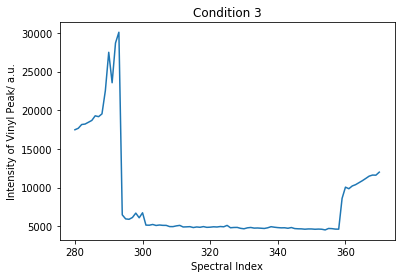

In [12]:
# Condition
df.loc[280:370,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3')
plt.show()

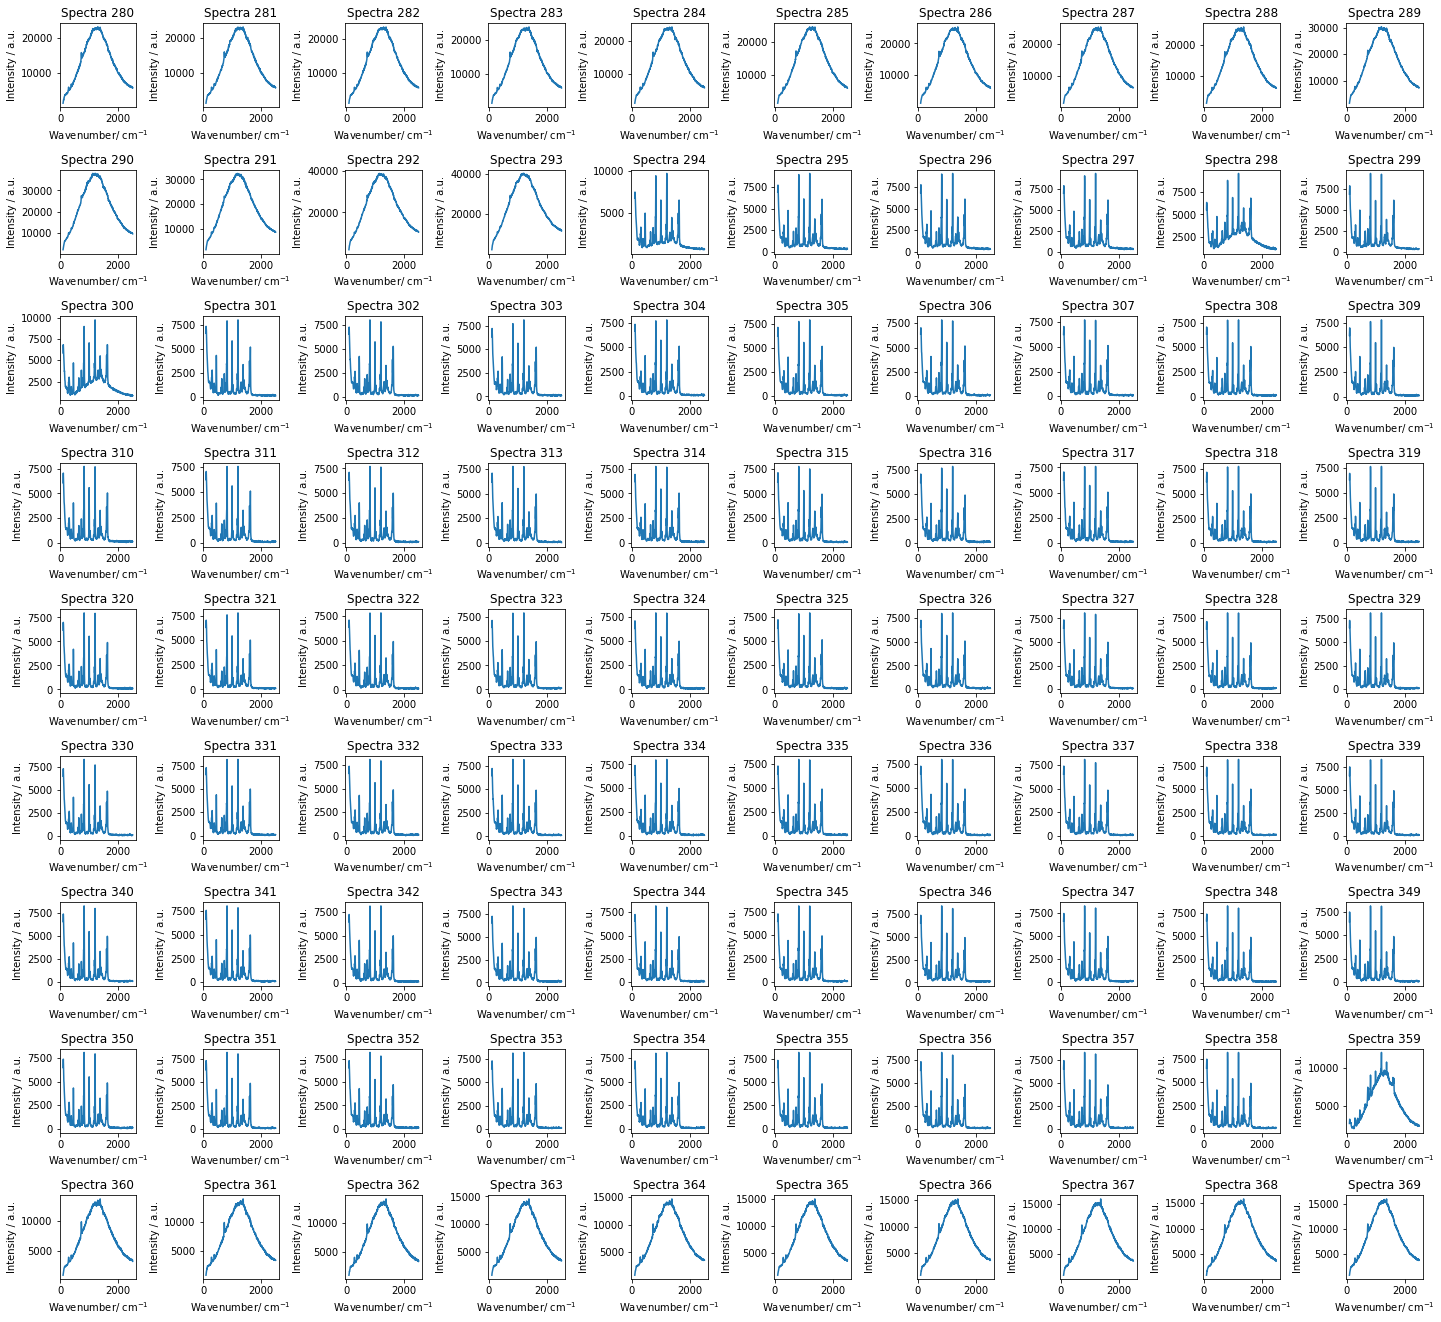

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(280, 370):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-279))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[330:349, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =3)
condition3_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
330,3,6489.0,7172.0,7300.0,6761.0,6200.0,5494.0,5128.0,4656.0,4335.0,...,125.0,46.0,88.0,39.0,111.0,125.0,125.0,112.0,112.0,114.0
331,3,6555.0,7111.0,7288.0,6868.0,6243.0,5566.0,4975.0,4689.0,4425.0,...,109.0,128.0,138.0,90.0,119.0,113.0,125.0,121.0,115.0,110.0
332,3,6601.0,7289.0,7347.0,6821.0,6287.0,5667.0,5220.0,4682.0,4308.0,...,101.0,68.0,144.0,77.0,69.0,105.0,134.0,116.0,165.0,85.0
333,3,6473.0,7138.0,7232.0,6848.0,6248.0,5482.0,5080.0,4530.0,4427.0,...,105.0,94.0,60.0,110.0,75.0,117.0,132.0,114.0,95.0,66.0
334,3,6365.0,7164.0,7391.0,6987.0,6229.0,5503.0,5075.0,4766.0,4346.0,...,169.0,100.0,134.0,117.0,89.0,125.0,157.0,107.0,130.0,87.0
335,3,6478.0,7136.0,7285.0,6902.0,6289.0,5659.0,5223.0,4733.0,4460.0,...,57.0,89.0,100.0,76.0,106.0,145.0,139.0,52.0,139.0,32.0
336,3,6524.0,7302.0,7087.0,6847.0,6312.0,5651.0,5130.0,4793.0,4522.0,...,136.0,100.0,117.0,117.0,155.0,87.0,191.0,139.0,152.0,107.0
337,3,6562.0,7242.0,7416.0,6931.0,6310.0,5524.0,5223.0,4809.0,4301.0,...,161.0,179.0,50.0,103.0,165.0,162.0,167.0,118.0,88.0,86.0
338,3,6444.0,7242.0,7331.0,7096.0,6294.0,5761.0,5085.0,4743.0,4440.0,...,157.0,131.0,107.0,82.0,130.0,88.0,136.0,148.0,190.0,144.0
339,3,6524.0,7245.0,7457.0,6930.0,6212.0,5701.0,5081.0,4708.0,4276.0,...,137.0,74.0,108.0,61.0,169.0,92.0,120.0,111.0,132.0,94.0


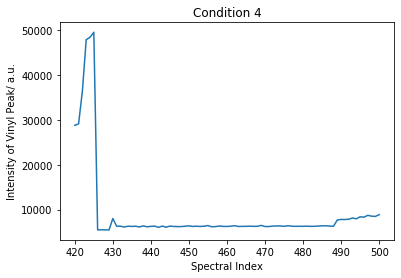

In [15]:
# Condition
df.loc[420:500,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4')
plt.show()

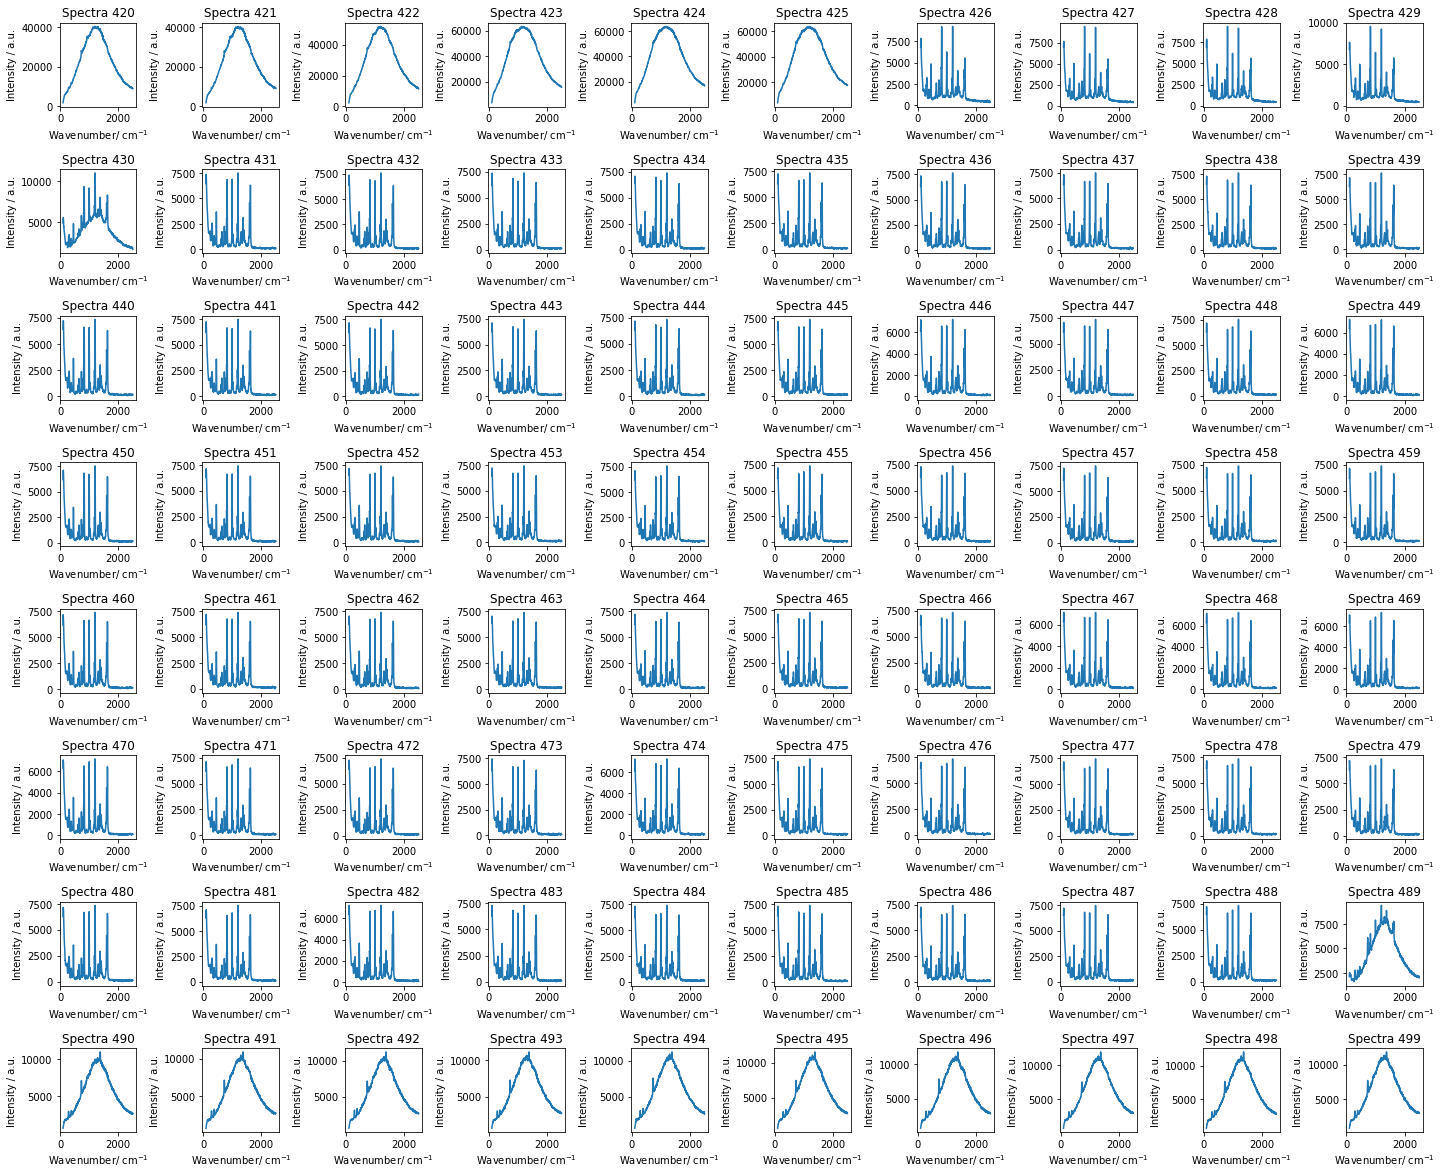

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(420, 500):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-419))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[460:479, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =4)
condition4_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
460,4,6185.0,7179.0,6977.0,6668.0,6282.0,5539.0,5084.0,4681.0,4330.0,...,97.0,130.0,106.0,128.0,147.0,145.0,149.0,145.0,131.0,122.0
461,4,6219.0,6986.0,7199.0,6744.0,6221.0,5684.0,5068.0,4536.0,4443.0,...,111.0,160.0,150.0,8.0,168.0,112.0,135.0,145.0,141.0,137.0
462,4,6273.0,6917.0,7048.0,6715.0,6191.0,5664.0,5197.0,4634.0,4598.0,...,155.0,69.0,134.0,72.0,150.0,122.0,153.0,73.0,115.0,51.0
463,4,6338.0,6948.0,7039.0,6752.0,6346.0,5623.0,5088.0,4692.0,4418.0,...,153.0,95.0,148.0,80.0,127.0,125.0,160.0,88.0,181.0,124.0
464,4,6282.0,7146.0,7197.0,6874.0,6284.0,5477.0,5166.0,4827.0,4526.0,...,145.0,137.0,110.0,159.0,133.0,113.0,159.0,173.0,129.0,145.0
465,4,6412.0,6893.0,7132.0,6796.0,6211.0,5689.0,5190.0,4697.0,4415.0,...,139.0,164.0,119.0,135.0,107.0,109.0,147.0,134.0,95.0,109.0
466,4,6130.0,7038.0,6989.0,6717.0,6251.0,5570.0,5126.0,4626.0,4389.0,...,137.0,124.0,144.0,39.0,102.0,120.0,151.0,135.0,153.0,52.0
467,4,6301.0,6937.0,7141.0,6846.0,6160.0,5542.0,5104.0,4715.0,4466.0,...,167.0,91.0,133.0,114.0,143.0,116.0,119.0,152.0,149.0,84.0
468,4,6268.0,7057.0,7148.0,6750.0,6301.0,5501.0,5226.0,4799.0,4377.0,...,126.0,150.0,116.0,109.0,137.0,110.0,137.0,151.0,151.0,104.0
469,4,6340.0,7063.0,7063.0,6889.0,6181.0,5665.0,5201.0,4857.0,4462.0,...,151.0,141.0,139.0,159.0,132.0,125.0,166.0,114.0,169.0,145.0


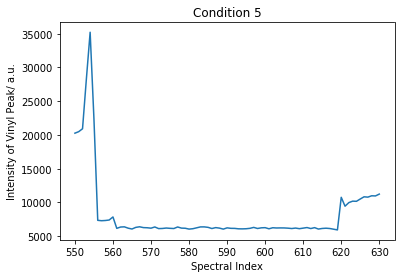

In [18]:
# Condition
df.loc[550:630,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5')
plt.show()

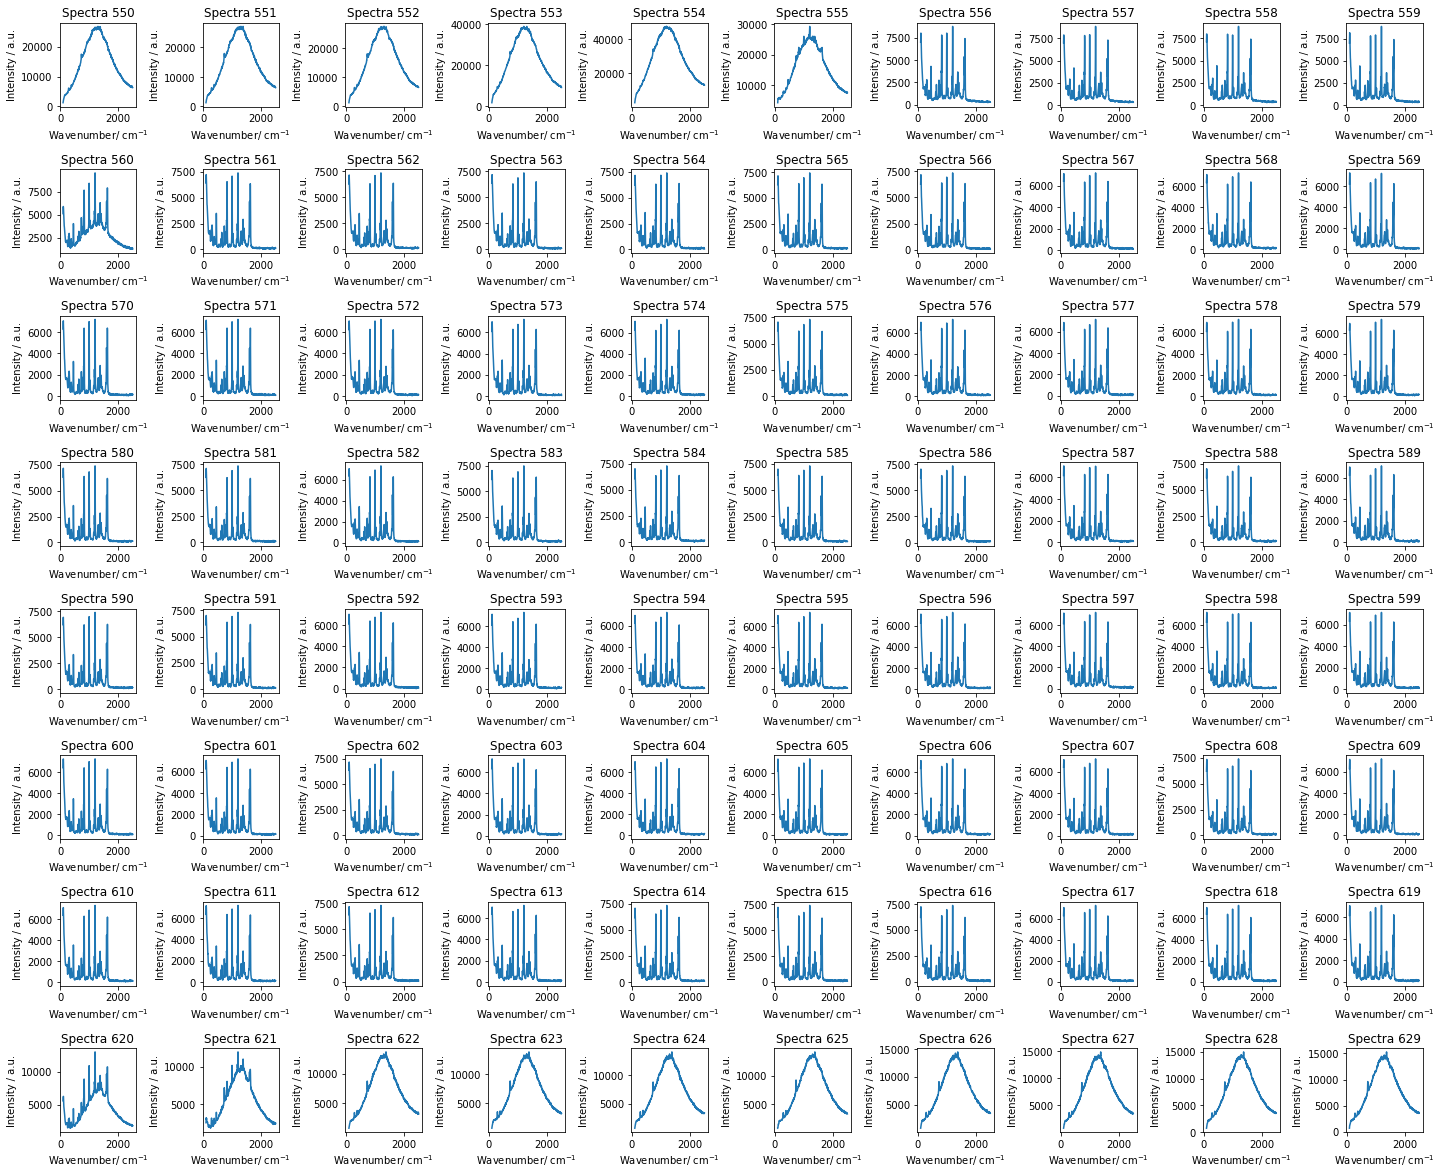

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(550, 630):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-549))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[590:609, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =5)
condition5_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
590,5,6203.0,6810.0,6919.0,6551.0,6028.0,5643.0,4994.0,4712.0,4455.0,...,105.0,154.0,169.0,104.0,113.0,125.0,166.0,114.0,122.0,133.0
591,5,6123.0,6885.0,7020.0,6568.0,6261.0,5613.0,5026.0,4718.0,4199.0,...,127.0,124.0,129.0,84.0,135.0,126.0,141.0,132.0,120.0,104.0
592,5,6098.0,7000.0,6971.0,6576.0,6087.0,5457.0,5028.0,4718.0,4358.0,...,138.0,119.0,80.0,136.0,139.0,96.0,157.0,142.0,132.0,58.0
593,5,6088.0,6847.0,7113.0,6526.0,6027.0,5486.0,4959.0,4621.0,4291.0,...,108.0,63.0,123.0,105.0,159.0,96.0,113.0,149.0,117.0,132.0
594,5,6260.0,6815.0,6991.0,6587.0,6031.0,5416.0,5076.0,4652.0,4248.0,...,75.0,52.0,146.0,119.0,123.0,118.0,138.0,129.0,110.0,74.0
595,5,6289.0,6911.0,6985.0,6698.0,6417.0,5605.0,5025.0,4665.0,4278.0,...,132.0,141.0,97.0,123.0,89.0,91.0,144.0,129.0,137.0,109.0
596,5,6251.0,6934.0,7099.0,6752.0,6087.0,5451.0,5014.0,4715.0,4457.0,...,145.0,116.0,104.0,98.0,190.0,70.0,175.0,105.0,140.0,151.0
597,5,6163.0,6868.0,7142.0,6629.0,6088.0,5501.0,5055.0,4675.0,4320.0,...,103.0,83.0,164.0,95.0,149.0,122.0,159.0,140.0,151.0,129.0
598,5,6306.0,6919.0,7232.0,6530.0,6204.0,5475.0,4967.0,4723.0,4176.0,...,159.0,131.0,94.0,98.0,161.0,118.0,203.0,117.0,153.0,113.0
599,5,6350.0,7108.0,7155.0,6781.0,6101.0,5642.0,5147.0,4597.0,4431.0,...,171.0,188.0,137.0,156.0,82.0,159.0,175.0,66.0,155.0,111.0


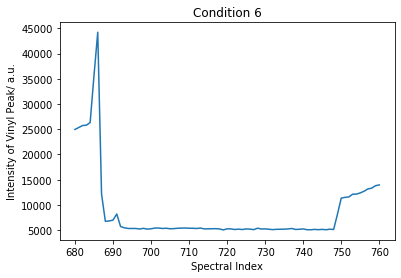

In [21]:
# Condition
df.loc[680:760,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6')
plt.show()

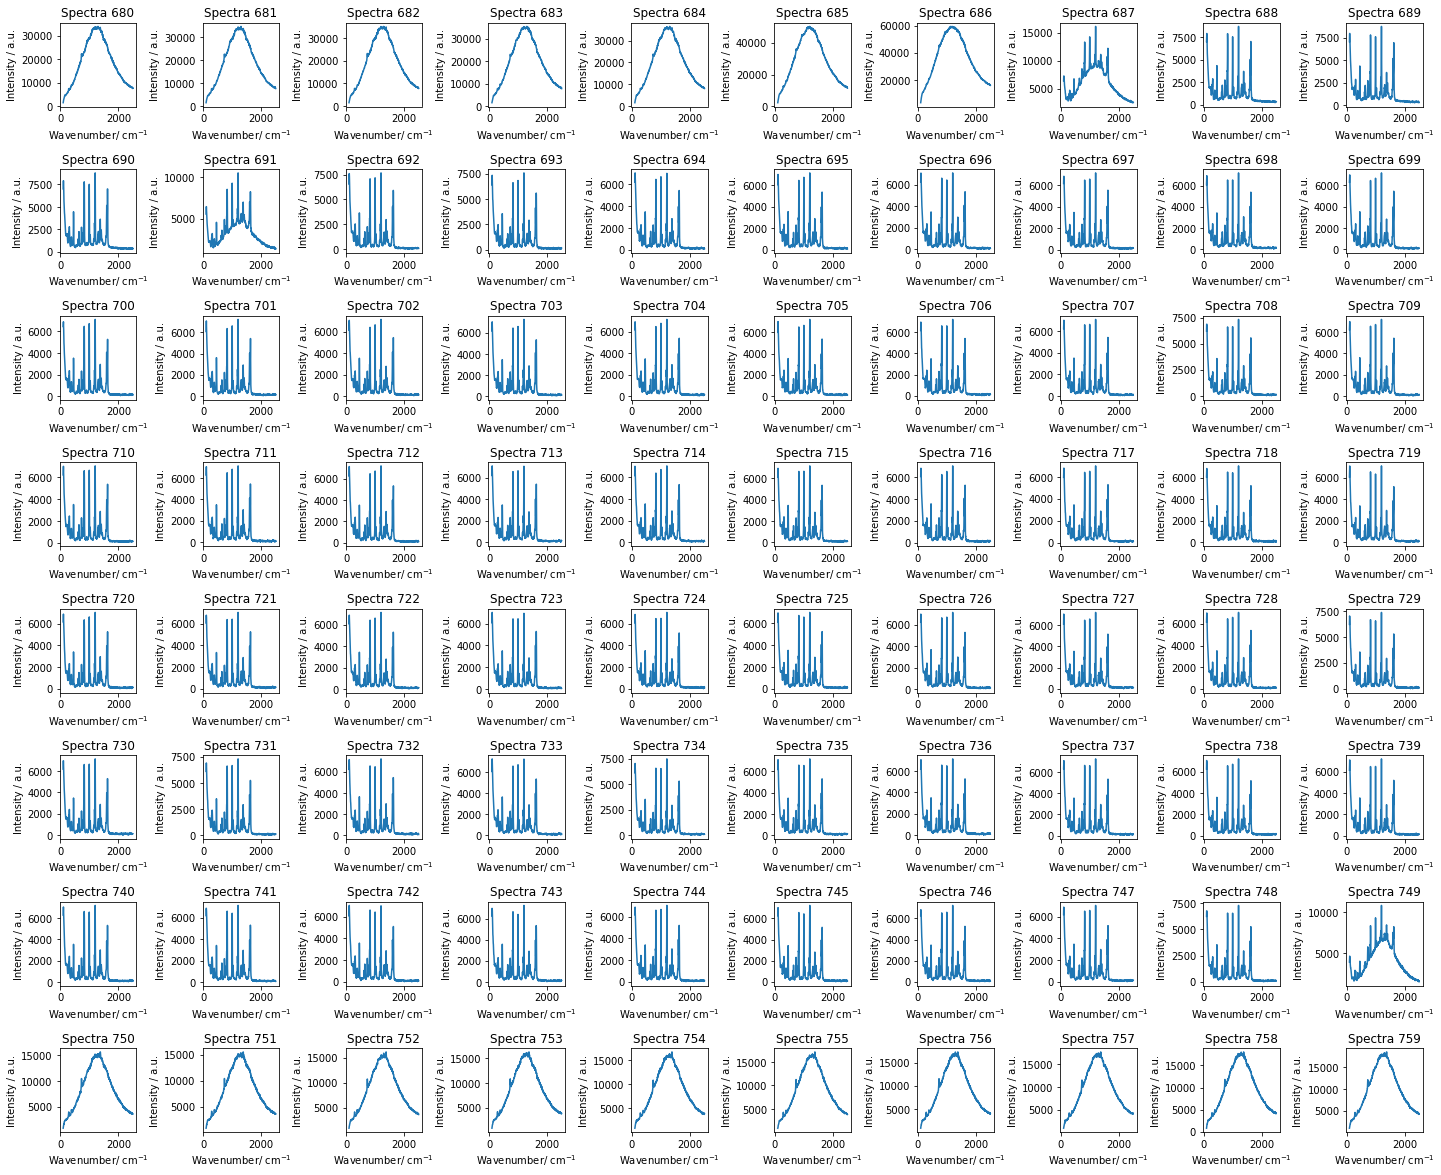

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(680, 760):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-679))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[720:739, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =6)
condition6_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
720,6,6171.0,6671.0,6889.0,6454.0,5930.0,5273.0,4906.0,4442.0,4196.0,...,176.0,111.0,165.0,124.0,156.0,176.0,160.0,116.0,171.0,120.0
721,6,6059.0,6746.0,6776.0,6560.0,5876.0,5420.0,4797.0,4509.0,4260.0,...,111.0,131.0,111.0,97.0,110.0,141.0,125.0,140.0,177.0,128.0
722,6,6090.0,6678.0,6888.0,6451.0,5914.0,5279.0,4894.0,4352.0,4143.0,...,112.0,128.0,55.0,116.0,122.0,122.0,83.0,121.0,76.0,105.0
723,6,6075.0,6701.0,7012.0,6403.0,5963.0,5439.0,4889.0,4488.0,4252.0,...,112.0,181.0,61.0,126.0,115.0,150.0,149.0,106.0,96.0,84.0
724,6,6081.0,6698.0,6852.0,6512.0,6023.0,5384.0,4945.0,4438.0,4204.0,...,78.0,132.0,134.0,84.0,148.0,113.0,98.0,124.0,181.0,72.0
725,6,6129.0,6940.0,6950.0,6636.0,6048.0,5413.0,4956.0,4584.0,4230.0,...,101.0,126.0,158.0,103.0,151.0,142.0,135.0,68.0,176.0,129.0
726,6,6214.0,6971.0,6888.0,6590.0,6018.0,5416.0,4821.0,4569.0,4247.0,...,130.0,192.0,106.0,81.0,136.0,154.0,174.0,138.0,119.0,123.0
727,6,6114.0,7055.0,6891.0,6538.0,6145.0,5385.0,4768.0,4532.0,4248.0,...,134.0,140.0,104.0,106.0,90.0,75.0,117.0,138.0,84.0,93.0
728,6,6165.0,6723.0,6992.0,6759.0,6086.0,5504.0,4961.0,4538.0,4265.0,...,135.0,137.0,142.0,95.0,104.0,182.0,130.0,117.0,145.0,124.0
729,6,6213.0,7018.0,6918.0,6637.0,6139.0,5422.0,4975.0,4609.0,4315.0,...,141.0,114.0,98.0,82.0,126.0,85.0,127.0,73.0,142.0,133.0


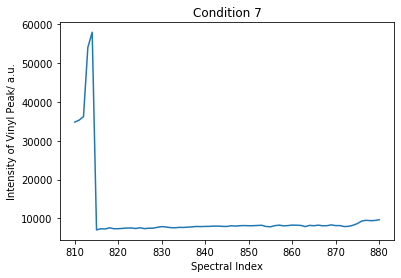

In [24]:
# Condition
df.loc[810:880,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7')
plt.show()

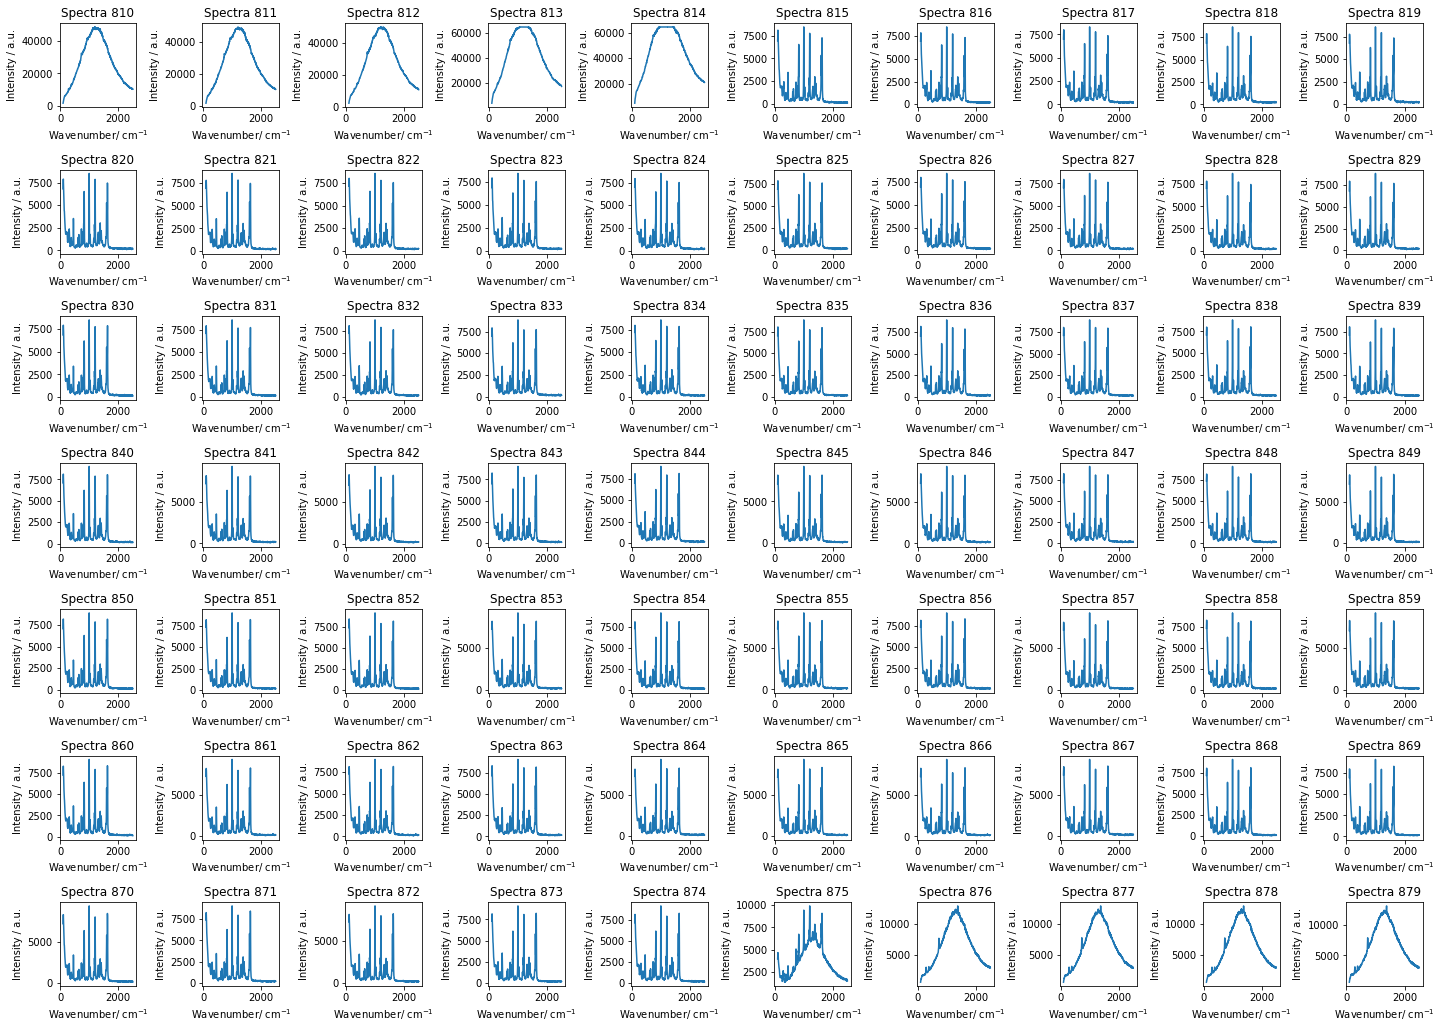

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(810, 880):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-809))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[850:869, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =7)
condition7_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
850,7,7083.0,8007.0,8205.0,7710.0,7305.0,6515.0,5750.0,5571.0,5049.0,...,143.0,171.0,179.0,103.0,181.0,164.0,150.0,201.0,140.0,117.0
851,7,7340.0,8079.0,8212.0,7748.0,7295.0,6587.0,5888.0,5480.0,5090.0,...,200.0,174.0,187.0,185.0,199.0,144.0,155.0,153.0,203.0,167.0
852,7,7405.0,8023.0,8436.0,7774.0,7103.0,6354.0,5863.0,5510.0,5103.0,...,219.0,161.0,153.0,179.0,142.0,201.0,190.0,186.0,214.0,111.0
853,7,7297.0,8013.0,8221.0,7729.0,7225.0,6371.0,5910.0,5475.0,5174.0,...,163.0,146.0,175.0,135.0,148.0,188.0,167.0,118.0,164.0,127.0
854,7,7317.0,8099.0,8104.0,7749.0,7066.0,6379.0,5774.0,5433.0,4975.0,...,223.0,160.0,123.0,165.0,172.0,125.0,151.0,184.0,154.0,147.0
855,7,7254.0,7956.0,8159.0,7731.0,7268.0,6361.0,5940.0,5350.0,5085.0,...,179.0,105.0,139.0,105.0,164.0,130.0,142.0,132.0,155.0,139.0
856,7,7326.0,8014.0,8131.0,8054.0,7201.0,6350.0,5979.0,5587.0,5123.0,...,227.0,211.0,185.0,149.0,202.0,179.0,221.0,188.0,171.0,129.0
857,7,7208.0,8113.0,8099.0,7711.0,7162.0,6301.0,5936.0,5549.0,5063.0,...,209.0,191.0,186.0,160.0,185.0,206.0,171.0,210.0,186.0,186.0
858,7,7306.0,8129.0,8259.0,7868.0,7143.0,6481.0,5738.0,5708.0,5059.0,...,178.0,157.0,216.0,152.0,172.0,212.0,188.0,192.0,224.0,139.0
859,7,7086.0,8067.0,8289.0,7799.0,7100.0,6588.0,6015.0,5558.0,5127.0,...,108.0,185.0,126.0,128.0,153.0,218.0,164.0,186.0,188.0,146.0


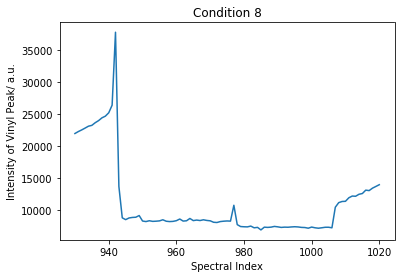

In [27]:
# Condition
df.loc[930:1020,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8')
plt.show()

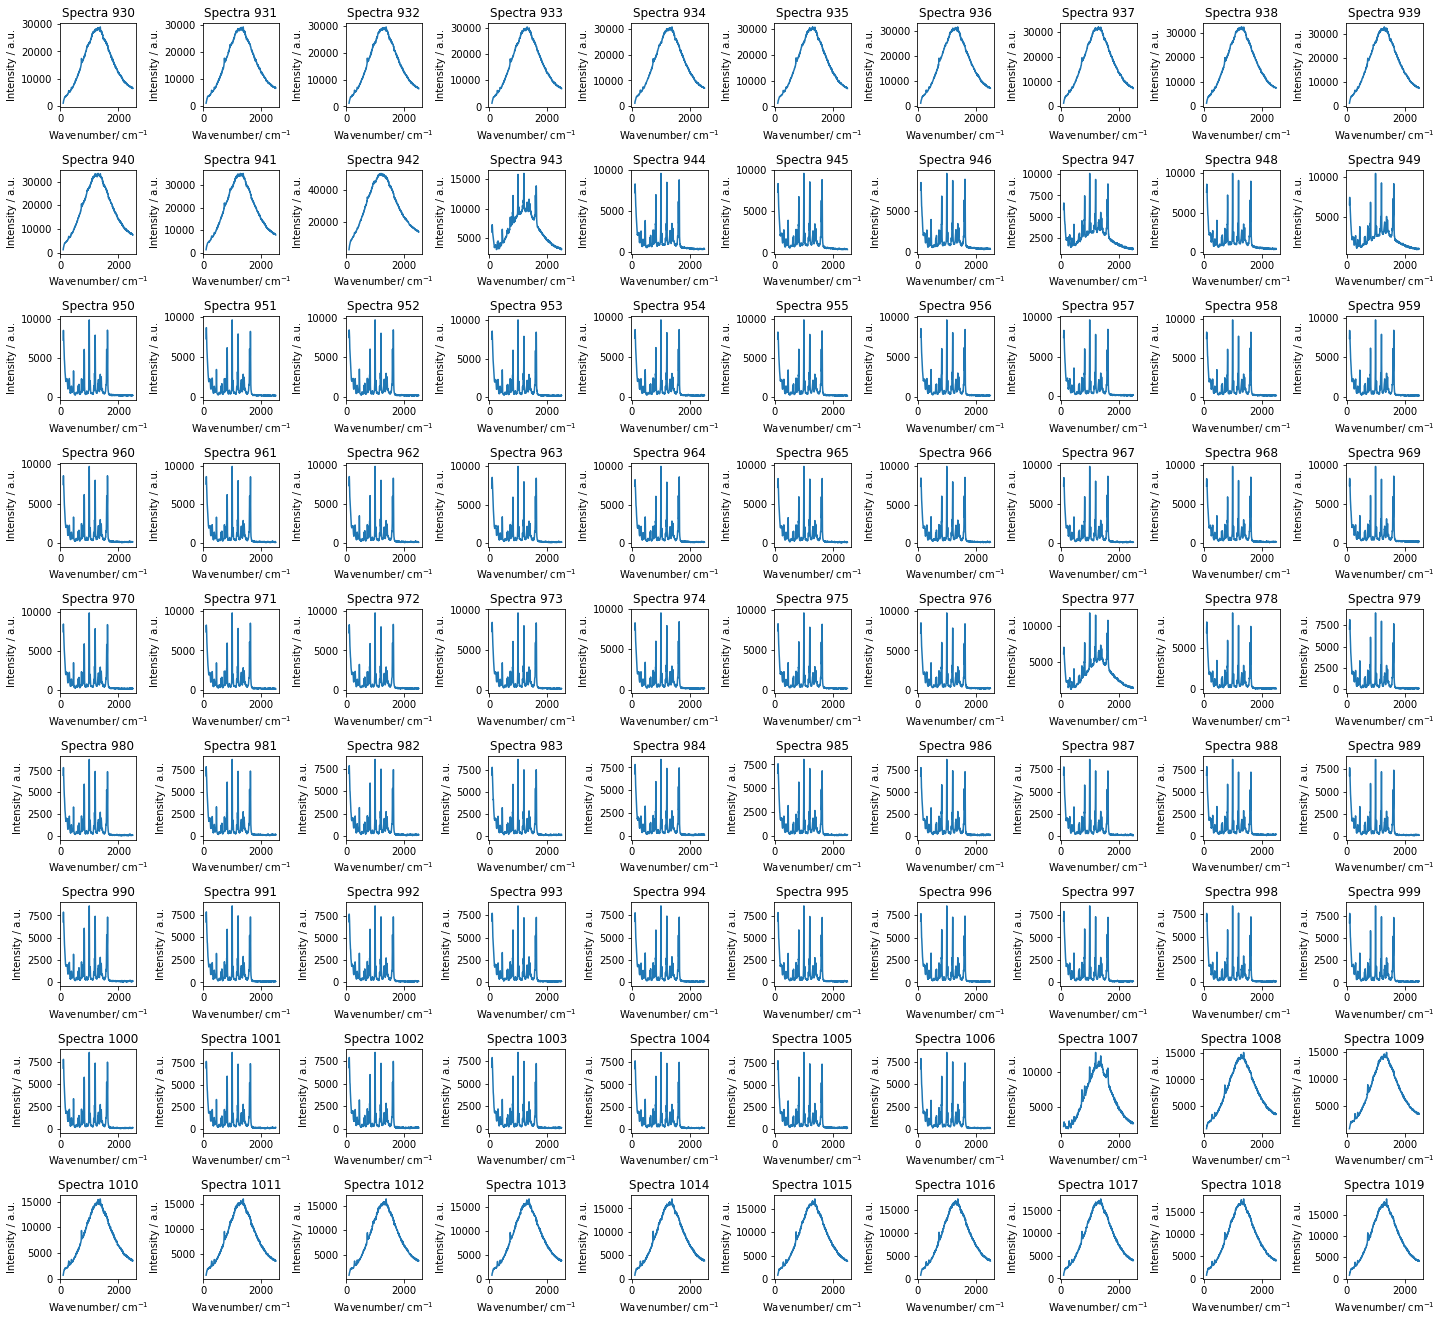

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(930, 1020):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-929))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[980:999, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =8)
condition8_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
980,8,6950.0,7651.0,7836.0,7468.0,6799.0,6109.0,5513.0,5242.0,4777.0,...,102.0,146.0,149.0,114.0,152.0,151.0,156.0,128.0,111.0,108.0
981,8,6854.0,7893.0,7529.0,7343.0,6685.0,6213.0,5411.0,5149.0,4846.0,...,119.0,114.0,127.0,113.0,111.0,104.0,175.0,111.0,185.0,86.0
982,8,7019.0,7700.0,7886.0,7447.0,6777.0,6233.0,5610.0,5065.0,4956.0,...,133.0,110.0,99.0,135.0,144.0,85.0,177.0,113.0,158.0,100.0
983,8,6885.0,7584.0,7756.0,7321.0,6994.0,6214.0,5806.0,5354.0,4884.0,...,105.0,133.0,126.0,138.0,143.0,124.0,124.0,212.0,125.0,81.0
984,8,6812.0,7498.0,7823.0,7507.0,6738.0,6118.0,5560.0,5220.0,4796.0,...,158.0,133.0,99.0,139.0,173.0,97.0,193.0,139.0,139.0,91.0
985,8,6591.0,7206.0,7575.0,7095.0,6592.0,6023.0,5363.0,4951.0,4502.0,...,135.0,109.0,96.0,123.0,109.0,111.0,111.0,127.0,122.0,132.0
986,8,6780.0,7501.0,7731.0,7299.0,6829.0,5899.0,5455.0,5221.0,4776.0,...,140.0,130.0,126.0,113.0,158.0,89.0,146.0,124.0,156.0,100.0
987,8,6897.0,7665.0,7778.0,7447.0,6785.0,6190.0,5665.0,5079.0,4690.0,...,164.0,139.0,140.0,95.0,147.0,116.0,98.0,109.0,115.0,41.0
988,8,6912.0,7734.0,7902.0,7567.0,6816.0,6184.0,5707.0,5148.0,4837.0,...,139.0,154.0,127.0,128.0,153.0,114.0,161.0,134.0,120.0,141.0
989,8,6797.0,7674.0,7594.0,7321.0,6701.0,6014.0,5629.0,5087.0,4737.0,...,118.0,101.0,97.0,101.0,127.0,107.0,147.0,120.0,115.0,78.0


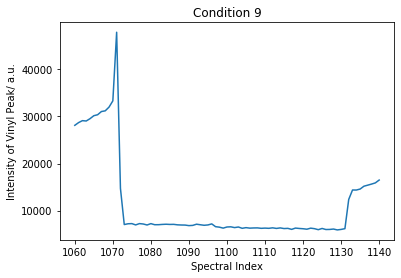

In [30]:
# Condition
df.loc[1060:1140,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.show()

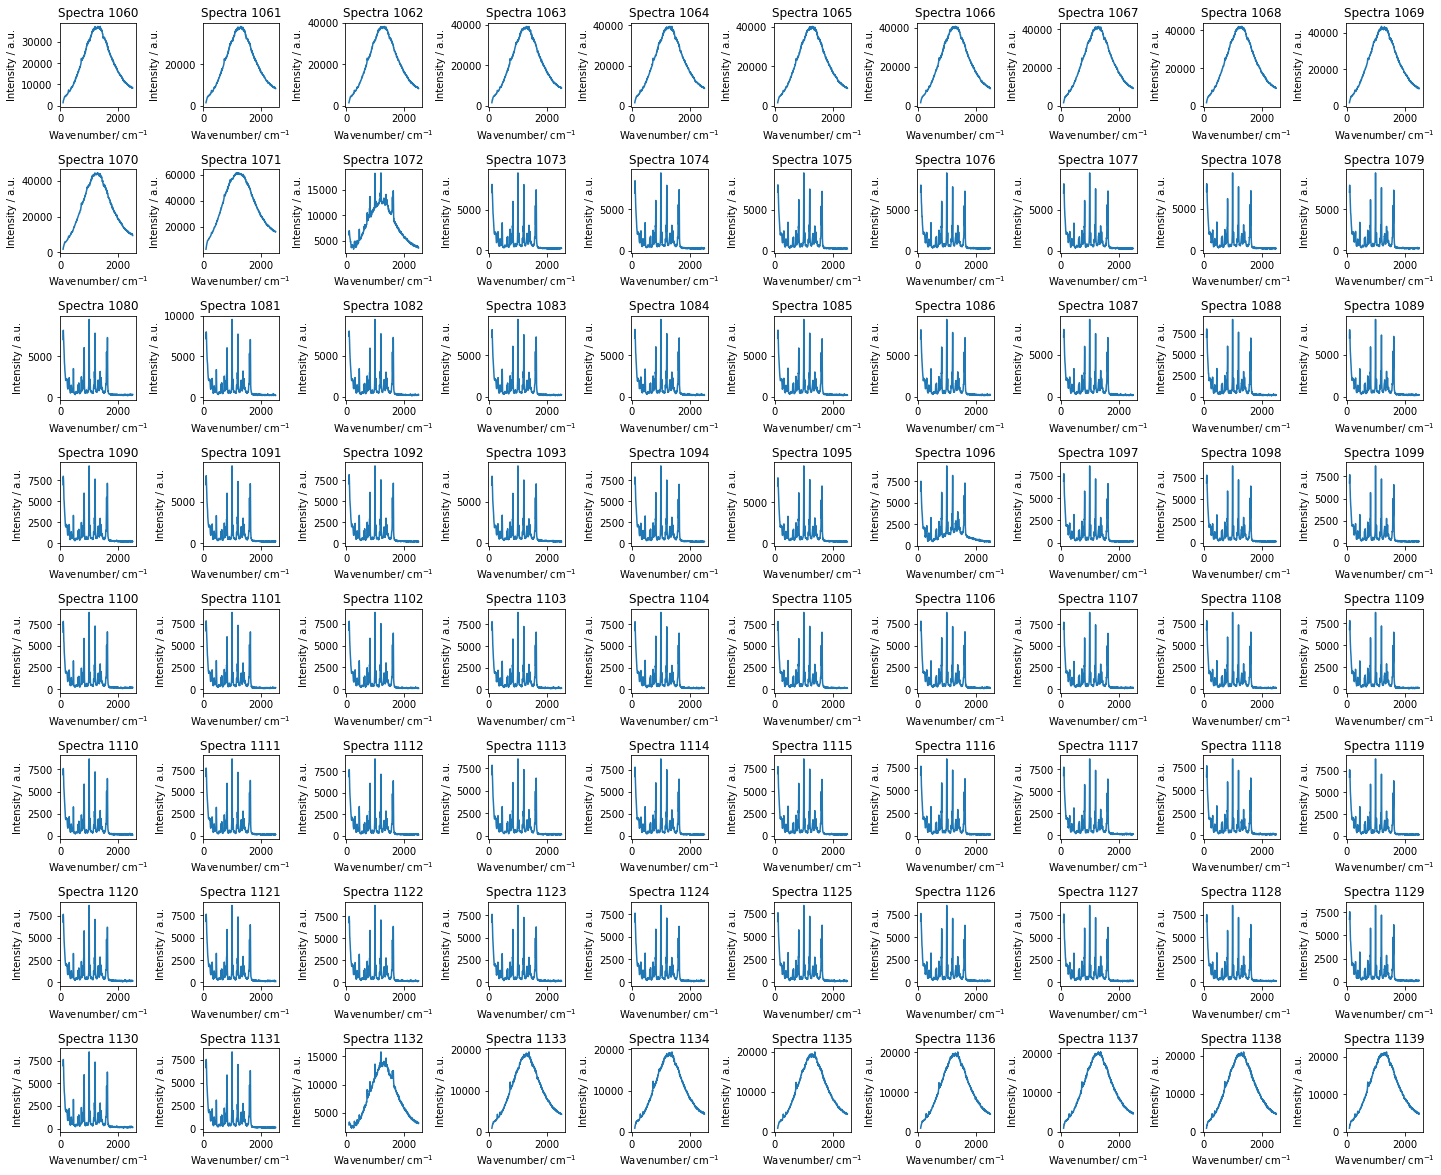

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(1060, 1140):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-1059))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[1110:1129, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =9)
condition9_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
1110,9,6912.0,7527.0,7607.0,7321.0,6622.0,5946.0,5517.0,5210.0,4746.0,...,149.0,148.0,158.0,122.0,154.0,149.0,171.0,151.0,153.0,65.0
1111,9,6767.0,7719.0,7665.0,7216.0,6751.0,5909.0,5415.0,5014.0,4712.0,...,194.0,107.0,153.0,124.0,142.0,179.0,127.0,182.0,136.0,149.0
1112,9,6857.0,7306.0,7662.0,7558.0,6675.0,6226.0,5528.0,5005.0,4678.0,...,153.0,89.0,149.0,82.0,176.0,111.0,162.0,130.0,151.0,106.0
1113,9,6786.0,7678.0,7821.0,7286.0,6791.0,5888.0,5392.0,4996.0,4790.0,...,152.0,137.0,126.0,134.0,175.0,164.0,195.0,152.0,204.0,141.0
1114,9,6735.0,7684.0,7787.0,7333.0,6552.0,6084.0,5570.0,5244.0,4715.0,...,171.0,154.0,142.0,130.0,156.0,160.0,207.0,173.0,168.0,161.0
1115,9,6978.0,7463.0,7747.0,7448.0,6718.0,6060.0,5522.0,5165.0,4644.0,...,191.0,187.0,156.0,196.0,140.0,155.0,222.0,161.0,203.0,160.0
1116,9,6733.0,7495.0,7678.0,7234.0,6765.0,5893.0,5509.0,5150.0,4633.0,...,106.0,121.0,119.0,106.0,163.0,146.0,184.0,110.0,161.0,119.0
1117,9,6768.0,7608.0,7708.0,7274.0,6810.0,5966.0,5402.0,5131.0,4679.0,...,145.0,180.0,107.0,144.0,155.0,137.0,164.0,140.0,151.0,128.0
1118,9,6528.0,7536.0,7726.0,7167.0,6476.0,5911.0,5464.0,5057.0,4688.0,...,118.0,167.0,114.0,82.0,98.0,109.0,206.0,140.0,124.0,89.0
1119,9,6752.0,7588.0,7514.0,7512.0,6812.0,5964.0,5474.0,5072.0,4678.0,...,125.0,87.0,154.0,116.0,118.0,127.0,173.0,119.0,114.0,106.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
80,1,4037.0,4351.0,4507.0,4274.0,4114.0,3487.0,3250.0,2991.0,2663.0,...,212.0,123.0,148.0,145.0,136.0,115.0,134.0,153.0,147.0,91.0
81,1,3949.0,4447.0,4579.0,4230.0,4009.0,3436.0,3162.0,2964.0,2699.0,...,170.0,106.0,159.0,96.0,137.0,97.0,159.0,97.0,111.0,123.0
82,1,4019.0,4294.0,4366.0,4223.0,3968.0,3432.0,3176.0,3016.0,2686.0,...,150.0,135.0,174.0,94.0,128.0,122.0,134.0,159.0,166.0,97.0
83,1,4029.0,4388.0,4439.0,4058.0,3931.0,3458.0,3231.0,2993.0,2838.0,...,183.0,143.0,158.0,164.0,122.0,143.0,180.0,144.0,185.0,129.0
84,1,4055.0,4437.0,4619.0,4163.0,4027.0,3629.0,3279.0,3012.0,2724.0,...,130.0,132.0,106.0,92.0,134.0,107.0,156.0,129.0,161.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,9,6639.0,7465.0,7585.0,6973.0,6495.0,5874.0,5356.0,5032.0,4716.0,...,191.0,122.0,146.0,118.0,111.0,101.0,174.0,152.0,171.0,103.0
1126,9,6795.0,7480.0,7618.0,7142.0,6634.0,5929.0,5596.0,4903.0,4839.0,...,123.0,176.0,129.0,141.0,147.0,176.0,184.0,182.0,139.0,138.0
1127,9,6702.0,7319.0,7637.0,7281.0,6593.0,5734.0,5346.0,4842.0,4703.0,...,162.0,182.0,125.0,180.0,171.0,197.0,88.0,130.0,145.0,97.0
1128,9,6749.0,7432.0,7513.0,7087.0,6501.0,6064.0,5407.0,5092.0,4731.0,...,133.0,154.0,128.0,121.0,133.0,146.0,166.0,149.0,168.0,88.0


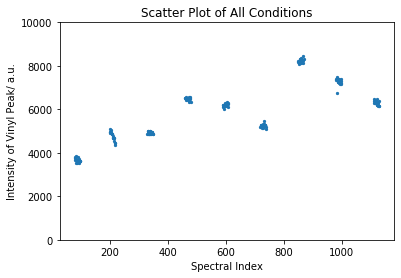

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions')
plt.ylim(0, 10000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
80,1,4037.0,4351.0,4507.0,4274.0,4114.0,3487.0,3250.0,2991.0,2663.0,...,212.0,123.0,148.0,145.0,136.0,115.0,134.0,153.0,147.0,91.0
81,1,3949.0,4447.0,4579.0,4230.0,4009.0,3436.0,3162.0,2964.0,2699.0,...,170.0,106.0,159.0,96.0,137.0,97.0,159.0,97.0,111.0,123.0
82,1,4019.0,4294.0,4366.0,4223.0,3968.0,3432.0,3176.0,3016.0,2686.0,...,150.0,135.0,174.0,94.0,128.0,122.0,134.0,159.0,166.0,97.0
83,1,4029.0,4388.0,4439.0,4058.0,3931.0,3458.0,3231.0,2993.0,2838.0,...,183.0,143.0,158.0,164.0,122.0,143.0,180.0,144.0,185.0,129.0
84,1,4055.0,4437.0,4619.0,4163.0,4027.0,3629.0,3279.0,3012.0,2724.0,...,130.0,132.0,106.0,92.0,134.0,107.0,156.0,129.0,161.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,9,6639.0,7465.0,7585.0,6973.0,6495.0,5874.0,5356.0,5032.0,4716.0,...,191.0,122.0,146.0,118.0,111.0,101.0,174.0,152.0,171.0,103.0
1126,9,6795.0,7480.0,7618.0,7142.0,6634.0,5929.0,5596.0,4903.0,4839.0,...,123.0,176.0,129.0,141.0,147.0,176.0,184.0,182.0,139.0,138.0
1127,9,6702.0,7319.0,7637.0,7281.0,6593.0,5734.0,5346.0,4842.0,4703.0,...,162.0,182.0,125.0,180.0,171.0,197.0,88.0,130.0,145.0,97.0
1128,9,6749.0,7432.0,7513.0,7087.0,6501.0,6064.0,5407.0,5092.0,4731.0,...,133.0,154.0,128.0,121.0,133.0,146.0,166.0,149.0,168.0,88.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.877942']].groupby('Condition').describe()

1629.877942                                                         \
                count     mean         std     min      25%     50%      75%   
Condition                                                                      
1                20.0  3561.55   50.782793  3463.0  3533.75  3560.0  3596.50   
2                20.0  4777.85  172.207425  4394.0  4684.00  4799.5  4892.75   
3                20.0  4766.85   83.550977  4623.0  4698.50  4773.5  4814.75   
4                20.0  6316.00   66.775350  6234.0  6275.75  6293.0  6345.25   
5                20.0  6183.05   63.953499  6088.0  6133.25  6179.5  6231.25   
6                20.0  5201.15   72.364047  5101.0  5156.00  5195.0  5241.75   
7                20.0  8136.60  128.736123  7843.0  8108.50  8136.0  8231.75   
8                20.0  7250.95  121.998911  6836.0  7230.25  7268.5  7312.25   
9                20.0  6167.45  132.042846  5912.0  6054.00  6210.0  6260.25   

                   
              max  
Condition          
1          3642.0  
2          5111.0  
3          4948.0  
4          6489.0  
5          6305.0  
6          5382.0  
7          8331.0  
8          7436.0  
9          6354.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t120.csv')